In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

font = {'family' : 'serif',
        'weight' : 'medium',
        'size'   : 12}

plt.rc('font', **font)

import numpy

In [4]:
#simulation type
#platform = "gazeboBaxter"
platform = "realBaxter"

trial_number = 0
total_trials = 15

##--data and video filenames--
input_filename = "XY_movement_square_+0.0cm"
#input_filename = "XY_movement_square_HIGHTABLE3_free"

data_folder = "PERFECT_SQUARE"
input_folder = "BaxterArm_VREP_simulation_data/square"
sim_type = "RealBaxter_Tabletop_PenNotebook"

[S0, S1, E1, W1]: [-0.60048157 -0.75280726  2.09665728  0.24717198]
[S0, S1, E1, W1]: [-0.60048157 -0.75280732  2.09665728  0.24717203]


<IPython.core.display.Javascript object>


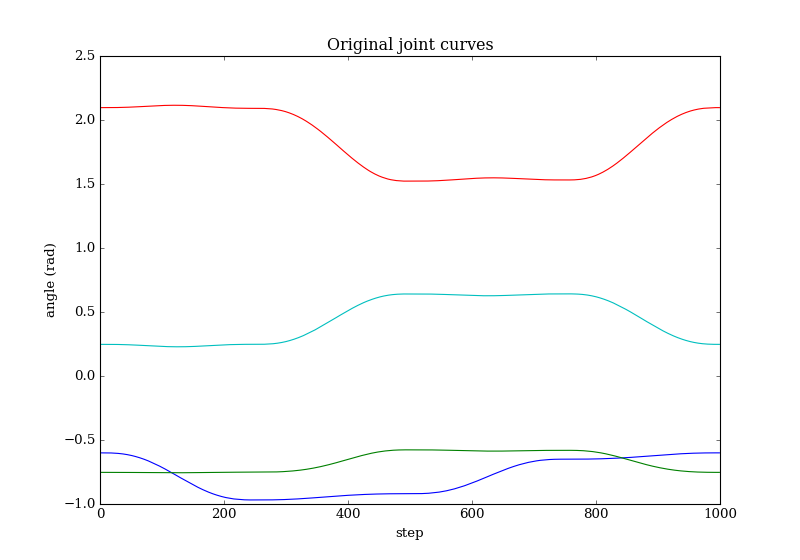

In [5]:
original_joints=numpy.zeros((0,4)) #creates an empty array with the right shape...
temp=numpy.load("./"+input_folder+"/"+input_filename+".npy")
original_joints=numpy.concatenate((original_joints,temp[:1000]))

joints=numpy.copy(original_joints)


print "[S0, S1, E1, W1]:",joints[0,:]
print "[S0, S1, E1, W1]:",joints[-1,:]

plt.figure(figsize=(10,7))
plt.plot(joints)
plt.title("Original joint curves")
plt.ylabel("angle (rad)")
plt.xlabel("step")
plt.show()

In [16]:
angles_from_robot = []
position_from_robot = []
endpoint_velocity = []
orientation_from_robot = []
endpoint_torque = []
endpoint_force = []
for trial_number in range(total_trials):
    angles_from_robot.append(numpy.load(data_folder+"/"+sim_type+"ANGLES_trial"+str(trial_number)+".npy"))
    position_from_robot.append(numpy.load(data_folder+"/"+sim_type+"POSITION_trial"+str(trial_number)+".npy"))
    endpoint_velocity.append(numpy.load(data_folder+"/"+sim_type+"VELOCITY_trial"+str(trial_number)+".npy"))
    orientation_from_robot.append(numpy.load(data_folder+"/"+sim_type+"ORIENTATION_trial"+str(trial_number)+".npy"))
    endpoint_torque.append(numpy.load(data_folder+"/"+sim_type+"TORQUE_trial"+str(trial_number)+".npy"))
    endpoint_force.append(numpy.load(data_folder+"/"+sim_type+"FORCE_trial"+str(trial_number)+".npy"))

<IPython.core.display.Javascript object>


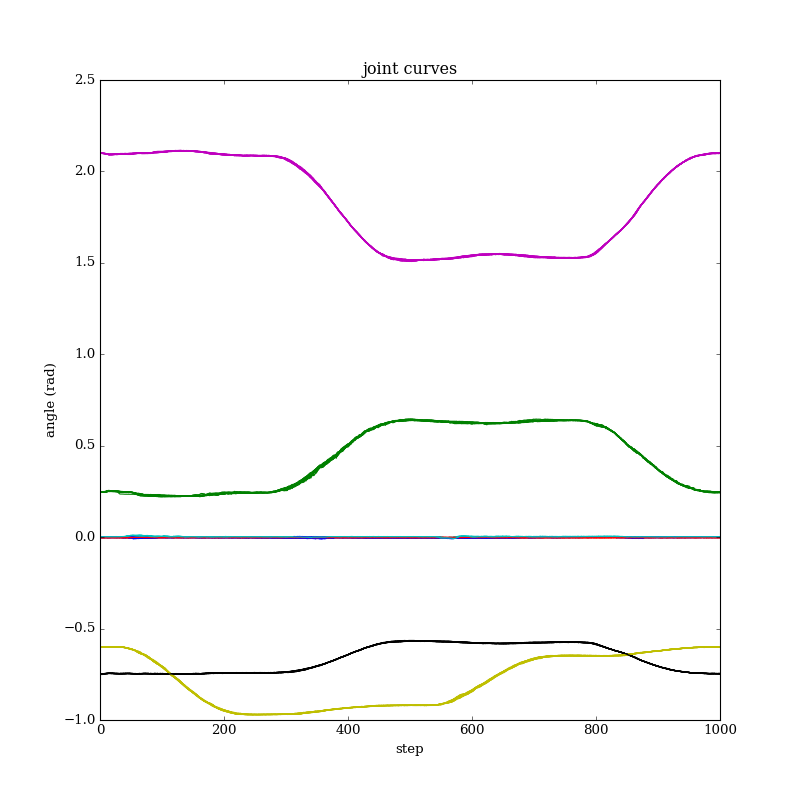

<IPython.core.display.Javascript object>


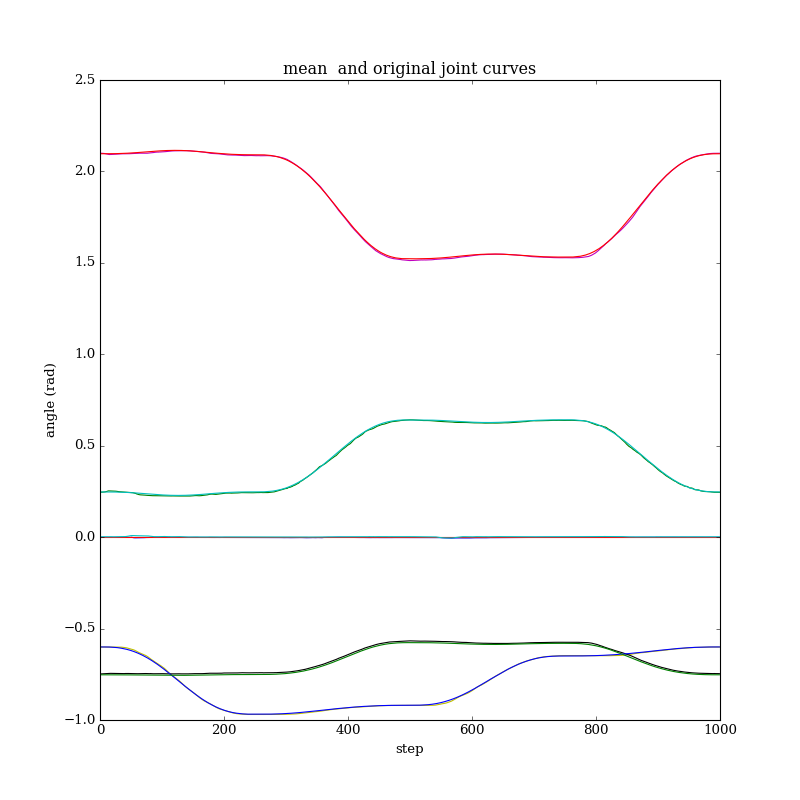

In [21]:

plt.figure(figsize=(10,10))
for trial_number in range(total_trials): plt.plot(angles_from_robot[trial_number])
plt.title("joint curves")
plt.ylabel("angle (rad)")
plt.xlabel("step")
plt.show()




plt.figure(figsize=(10,10))
plt.plot(numpy.mean(angles_from_robot,axis=0))
plt.plot(original_joints)
plt.title("mean  and original joint curves")
plt.ylabel("angle (rad)")
plt.xlabel("step")
plt.show()

<IPython.core.display.Javascript object>


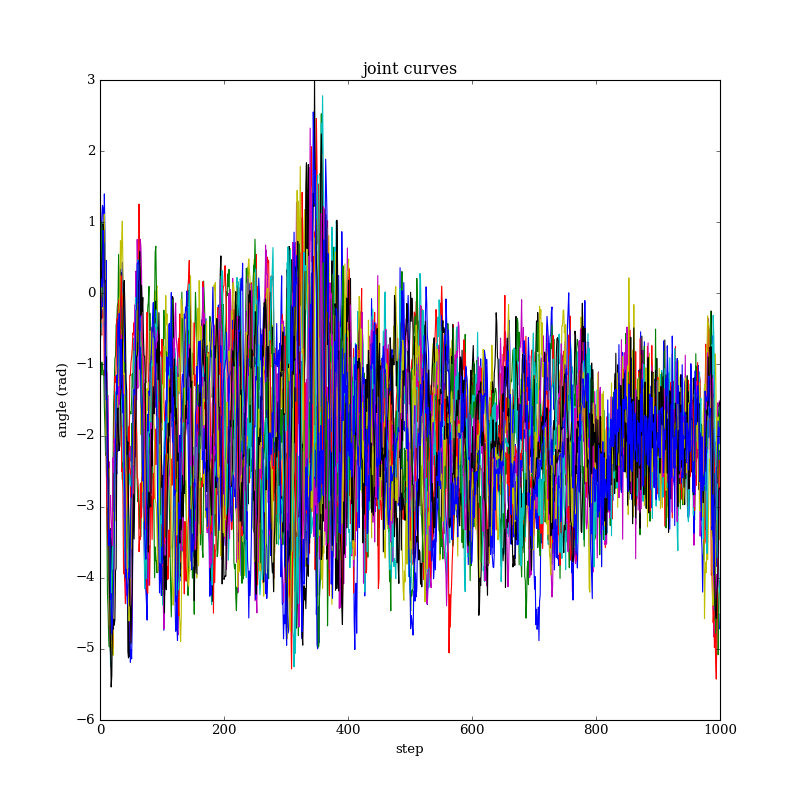

In [27]:

plt.figure(figsize=(10,10))
for trial_number in range(total_trials): plt.plot(endpoint_force[trial_number][:,2])
plt.title("joint curves")
plt.ylabel("angle (rad)")
plt.xlabel("step")
plt.show()

In [26]:
endpoint_force[trial_number][:,2].shape

(1000,)